# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
Boston = pd.read_table('Boston.txt', sep=',', dtype='float32')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
2.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
3.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
4.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
5.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [3]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 506 entries, 1.0 to 506.0
Data columns (total 14 columns):
crim       506 non-null float32
zn         506 non-null float32
indus      506 non-null float32
chas       506 non-null float32
nox        506 non-null float32
rm         506 non-null float32
age        506 non-null float32
dis        506 non-null float32
rad        506 non-null float32
tax        506 non-null float32
ptratio    506 non-null float32
black      506 non-null float32
lstat      506 non-null float32
medv       506 non-null float32
dtypes: float32(14)
memory usage: 31.6 KB


In [4]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613523,11.363636,11.136797,0.069170,0.554696,6.284636,68.574921,3.795043,9.549407,408.237152,18.455584,356.674561,12.653064,22.532806
std,8.601545,23.322390,6.860355,0.253993,0.115878,0.702617,28.148869,2.105711,8.707269,168.537170,2.164946,91.294838,7.141063,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [5]:
X_train = Boston.drop('medv', axis=1).values[:404,:]
Y_train = Boston.loc[:,['medv']].values[:404,:]

X_test = Boston.drop('medv', axis=1).values[404:,:]
Y_test = Boston.loc[:,['medv']].values[404:,:]

In [6]:
class Layer1():
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.build()
        
    def build(self):
        self.weights = []
        self.mu = tf.zeros(shape=(1,self.output_dim), dtype="float32")
        self.sigma = tf.ones(shape=(1,self.output_dim), dtype="float32")

    def __call__(self, inputs):
        return (inputs-self.mu)/self.sigma
    
class Layer2():
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.build()
        
    def add_weight(self, shape):
        weight_init = tf.random.normal(shape=shape, mean=0.0, stddev=0.05, dtype="float32")
        return tf.Variable(initial_value=weight_init, trainable=True)
        
    def build(self):
        self.w = self.add_weight(shape=(self.output_dim, self.input_dim))
        self.b = self.add_weight(shape=(self.output_dim, 1))
        self.weights = [self.w, self.b]

    def __call__(self, inputs):
        z = tf.matmul(self.w, tf.transpose(inputs)) + self.b
        return tf.transpose(z)

In [7]:
class LossFunction():
    
    def __init__(self, model):
        self.model = model

    def __call__(self, y_true, y_pred):
        return tf.math.reduce_mean(tf.math.square(y_true-y_pred))

In [8]:
class MetricFunction():
                    
    def __init__(self, model):
        self.model = model
        
    def __call__(self, y_true, y_pred):
        return tf.math.reduce_mean(tf.math.abs(y_true-y_pred))

In [9]:
class Optimizer():
    
    def __init__(self, model, learning_rate):
        self.model = model
        self.learning_rate = learning_rate
        self.stop_training = False
        
    def apply(self, grads, weights):
        for i in range(len(weights)):
            w = weights[i]
            grad_w = grads[i]
            weights[i].assign(w - self.learning_rate*grad_w)
            
    def train_step(self, X, Y):
        with tf.GradientTape() as tape:
            H = self.model(X)
            loss = self.model.loss(Y, H)
        grads = tape.gradient(loss, self.model.weights)
        self.apply(grads, self.model.weights)    
        H = self.model(X)
        loss = self.model.loss(Y, H)
        metric = self.model.metric(Y, H)
        logs = {'loss': loss,
                'metric': metric}
        return logs

In [10]:
class Callback1():

    def __init__(self, model, verbose):
        self.model = model
        self.verbose = verbose
    
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = tf.timestamp()
        
    def on_epoch_end(self, epoch, logs=None):
        if self.verbose:
            now = tf.timestamp()
            time = now - self.start_time
            tf.print('Epochs {}/{} - Loss: {} - Metric: {}'.format(epoch+1, self.model.epochs, logs['loss'], logs['metric']))
            tf.print('----- {}s -----'.format(tf.round(1000*time)/1000))
            
class Callback2():

    def __init__(self, model):
        self.model = model
        self.history = {'loss':[],
                        'metric':[]}
        
    def on_epoch_end(self, epoch, logs):
        self.history['loss'].append(logs['loss'].numpy())
        self.history['metric'].append(logs['metric'].numpy())
        
    def on_train_end(self):
        self.model.history = self.history

class Callback3():
        
    def __init__(self, model, patience, error, reduce_factor, min_learning_rate):
        self.model = model
        self.patience = patience
        self.error = error
        self.reduce_factor = reduce_factor
        self.min_learning_rate = min_learning_rate
                        
    def on_epoch_end(self, epoch, logs):
        if epoch==0:
            self.loss = logs['loss']
            self.non_decreasing_epochs = 0
        else:
            if ((self.loss-logs['loss'])>self.error):
                self.loss = logs['loss']
                self.non_decreasing_epochs = 0
            else:
                self.non_decreasing_epochs = self.non_decreasing_epochs+1
        if (self.non_decreasing_epochs == self.patience):
            if (self.model.optimizer.learning_rate>self.min_learning_rate):
                self.model.optimizer.learning_rate = self.reduce_factor*self.model.optimizer.learning_rate
                self.non_decreasing_epochs = 0
        
class Callback4():
        
    def __init__(self, model, patience, error):
        self.model = model
        self.patience = patience
        self.error = error
        
    def on_epoch_end(self, epoch, logs):
        if epoch==0:
            self.loss = logs['loss']
            self.non_decreasing_epochs = 0
        else:
            if ((self.loss-logs['loss'])>self.error):
                self.loss = logs['loss']
                self.non_decreasing_epochs = 0
            else:
                self.non_decreasing_epochs = self.non_decreasing_epochs+1
        if (self.non_decreasing_epochs == self.patience):
            self.model.optimizer.stop_training = True

In [11]:
class LinearRegression():
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.build()
    
    def build(self):
        self.h1 = Layer1(input_dim=self.input_dim, output_dim=self.input_dim)
        self.h2 = Layer2(input_dim=self.input_dim, output_dim=self.output_dim)
        self.layers = [self.h1, self.h2]
        self.weights = []
        for layer in self.layers:
            for weight in layer.weights:
                self.weights.append(weight)
        
    def __call__(self, inputs):
        a1 = self.h1(inputs)
        y = self.h2(a1) 
        return y
        
    def train_setup(self, epochs, learning_rate, verbose):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.loss = LossFunction(model=self)
        self.metric = MetricFunction(model=self)
        self.optimizer = Optimizer(model=self, learning_rate=self.learning_rate) 
        self.callbacks = [Callback1(model=self, verbose=self.verbose),
                          Callback2(model=self),
                          Callback3(model=self, patience=1000, error=0.001, reduce_factor=0.1, min_learning_rate=0.001),
                          Callback4(model=self, patience=2000, error=0.001)]
        
    def fit(self, X, Y, epochs=1000, learning_rate=0.01, verbose=True):
        self.layers[0].mu = tf.math.reduce_mean(tf.constant(X, dtype="float32"), axis=0)
        self.layers[0].sigma = tf.math.reduce_std(tf.constant(X, dtype="float32"), axis=0)
        self.train_setup(epochs, learning_rate, verbose)
        if verbose:
            print('Train on {} samples'.format(X.shape[0]))
        for epoch in range(self.epochs):
            self.callbacks[0].on_epoch_begin(epoch)
            logs = self.optimizer.train_step(tf.constant(X, dtype="float32"), tf.constant(Y, dtype="float32"))
            for callback in self.callbacks:
                callback.on_epoch_end(epoch, logs)
            if self.optimizer.stop_training:
                break
        self.callbacks[1].on_train_end()
            
    def predict(self, inputs):
        return self(tf.constant(inputs, dtype="float32")).numpy()
    
    def evaluate(self, X, Y):
        loss = self.loss(tf.constant(Y, dtype="float32"), self(tf.constant(X, dtype="float32")))
        loss_numpy = loss.numpy()
        metric = self.metric(tf.constant(Y, dtype="float32"), self(tf.constant(X, dtype="float32")))
        metric_numpy = metric.numpy()
        tf.print('Loss: {} - Metric: {}'.format(loss_numpy, metric_numpy))
        return [loss_numpy, metric_numpy]

In [12]:
linear_regression = LinearRegression(input_dim=X_train.shape[1], output_dim=Y_train.shape[1])

linear_regression.fit(X_train, Y_train)

Train on 404 samples
Epochs 1/1000 - Loss: 640.2774047851562 - Metric: 23.653839111328125
----- 0.015s -----
Epochs 2/1000 - Loss: 612.3370361328125 - Metric: 23.180757522583008
----- 0.003s -----
Epochs 3/1000 - Loss: 586.1819458007812 - Metric: 22.717144012451172
----- 0.002s -----
Epochs 4/1000 - Loss: 561.603515625 - Metric: 22.26280403137207
----- 0.004s -----
Epochs 5/1000 - Loss: 538.4297485351562 - Metric: 21.81754493713379
----- 0.003s -----
Epochs 6/1000 - Loss: 516.5184326171875 - Metric: 21.38119125366211
----- 0.003s -----
Epochs 7/1000 - Loss: 495.7506103515625 - Metric: 20.953569412231445
----- 0.003s -----
Epochs 8/1000 - Loss: 476.026611328125 - Metric: 20.534496307373047
----- 0.004s -----
Epochs 9/1000 - Loss: 457.2615966796875 - Metric: 20.123804092407227
----- 0.004s -----
Epochs 10/1000 - Loss: 439.3831481933594 - Metric: 19.721328735351562
----- 0.004s -----
Epochs 11/1000 - Loss: 422.32879638671875 - Metric: 19.326902389526367
----- 0.004s -----
Epochs 12/1000 -

----- 0.003s -----
Epochs 94/1000 - Loss: 37.89759063720703 - Metric: 4.281454563140869
----- 0.004s -----
Epochs 95/1000 - Loss: 37.354068756103516 - Metric: 4.234046459197998
----- 0.004s -----
Epochs 96/1000 - Loss: 36.831825256347656 - Metric: 4.188727855682373
----- 0.002s -----
Epochs 97/1000 - Loss: 36.330020904541016 - Metric: 4.145537853240967
----- 0.002s -----
Epochs 98/1000 - Loss: 35.84783172607422 - Metric: 4.103662967681885
----- 0.003s -----
Epochs 99/1000 - Loss: 35.384490966796875 - Metric: 4.06328821182251
----- 0.002s -----
Epochs 100/1000 - Loss: 34.939247131347656 - Metric: 4.024385452270508
----- 0.005s -----
Epochs 101/1000 - Loss: 34.511383056640625 - Metric: 3.9866318702697754
----- 0.002s -----
Epochs 102/1000 - Loss: 34.10020446777344 - Metric: 3.9507534503936768
----- 0.005s -----
Epochs 103/1000 - Loss: 33.705055236816406 - Metric: 3.9163920879364014
----- 0.003s -----
Epochs 104/1000 - Loss: 33.325286865234375 - Metric: 3.883119583129883
----- 0.003s ----

Epochs 185/1000 - Loss: 24.11775779724121 - Metric: 3.2044646739959717
----- 0.002s -----
Epochs 186/1000 - Loss: 24.09896469116211 - Metric: 3.20465087890625
----- 0.003s -----
Epochs 187/1000 - Loss: 24.080747604370117 - Metric: 3.2048709392547607
----- 0.004s -----
Epochs 188/1000 - Loss: 24.06307029724121 - Metric: 3.205110788345337
----- 0.003s -----
Epochs 189/1000 - Loss: 24.045917510986328 - Metric: 3.205397605895996
----- 0.003s -----
Epochs 190/1000 - Loss: 24.029272079467773 - Metric: 3.2057180404663086
----- 0.003s -----
Epochs 191/1000 - Loss: 24.01311683654785 - Metric: 3.20609450340271
----- 0.002s -----
Epochs 192/1000 - Loss: 23.99742317199707 - Metric: 3.206505537033081
----- 0.003s -----
Epochs 193/1000 - Loss: 23.982187271118164 - Metric: 3.2069077491760254
----- 0.004s -----
Epochs 194/1000 - Loss: 23.967384338378906 - Metric: 3.2073581218719482
----- 0.004s -----
Epochs 195/1000 - Loss: 23.95299530029297 - Metric: 3.207909345626831
----- 0.006s -----
Epochs 196/10

Epochs 276/1000 - Loss: 23.415063858032227 - Metric: 3.254828453063965
----- 0.003s -----
Epochs 277/1000 - Loss: 23.411657333374023 - Metric: 3.255093812942505
----- 0.004s -----
Epochs 278/1000 - Loss: 23.40827751159668 - Metric: 3.2553532123565674
----- 0.003s -----
Epochs 279/1000 - Loss: 23.404935836791992 - Metric: 3.2556076049804688
----- 0.002s -----
Epochs 280/1000 - Loss: 23.4016170501709 - Metric: 3.2558555603027344
----- 0.003s -----
Epochs 281/1000 - Loss: 23.39832878112793 - Metric: 3.256096839904785
----- 0.003s -----
Epochs 282/1000 - Loss: 23.395071029663086 - Metric: 3.256333827972412
----- 0.003s -----
Epochs 283/1000 - Loss: 23.3918399810791 - Metric: 3.2565646171569824
----- 0.002s -----
Epochs 284/1000 - Loss: 23.388635635375977 - Metric: 3.2567899227142334
----- 0.002s -----
Epochs 285/1000 - Loss: 23.385461807250977 - Metric: 3.257014751434326
----- 0.004s -----
Epochs 286/1000 - Loss: 23.382307052612305 - Metric: 3.2572362422943115
----- 0.002s -----
Epochs 287

Epochs 367/1000 - Loss: 23.18633460998535 - Metric: 3.2674357891082764
----- 0.002s -----
Epochs 368/1000 - Loss: 23.184450149536133 - Metric: 3.26749324798584
----- 0.002s -----
Epochs 369/1000 - Loss: 23.18256950378418 - Metric: 3.267549514770508
----- 0.004s -----
Epochs 370/1000 - Loss: 23.180702209472656 - Metric: 3.267604112625122
----- 0.003s -----
Epochs 371/1000 - Loss: 23.178844451904297 - Metric: 3.267657995223999
----- 0.003s -----
Epochs 372/1000 - Loss: 23.1769962310791 - Metric: 3.2677106857299805
----- 0.003s -----
Epochs 373/1000 - Loss: 23.17515754699707 - Metric: 3.2677624225616455
----- 0.005s -----
Epochs 374/1000 - Loss: 23.173330307006836 - Metric: 3.267812967300415
----- 0.002s -----
Epochs 375/1000 - Loss: 23.171510696411133 - Metric: 3.26786208152771
----- 0.004s -----
Epochs 376/1000 - Loss: 23.169702529907227 - Metric: 3.2679104804992676
----- 0.003s -----
Epochs 377/1000 - Loss: 23.16790199279785 - Metric: 3.267957925796509
----- 0.003s -----
Epochs 378/100

Epochs 458/1000 - Loss: 23.04863739013672 - Metric: 3.2706854343414307
----- 0.003s -----
Epochs 459/1000 - Loss: 23.04744529724121 - Metric: 3.270724058151245
----- 0.004s -----
Epochs 460/1000 - Loss: 23.046253204345703 - Metric: 3.2707629203796387
----- 0.003s -----
Epochs 461/1000 - Loss: 23.045074462890625 - Metric: 3.270800828933716
----- 0.004s -----
Epochs 462/1000 - Loss: 23.04389762878418 - Metric: 3.2708380222320557
----- 0.003s -----
Epochs 463/1000 - Loss: 23.042724609375 - Metric: 3.270875930786133
----- 0.005s -----
Epochs 464/1000 - Loss: 23.04155921936035 - Metric: 3.2709126472473145
----- 0.003s -----
Epochs 465/1000 - Loss: 23.0403995513916 - Metric: 3.2709529399871826
----- 0.004s -----
Epochs 466/1000 - Loss: 23.03924560546875 - Metric: 3.270993709564209
----- 0.002s -----
Epochs 467/1000 - Loss: 23.038097381591797 - Metric: 3.271038293838501
----- 0.004s -----
Epochs 468/1000 - Loss: 23.036956787109375 - Metric: 3.271085262298584
----- 0.003s -----
Epochs 469/1000

----- 0.004s -----
Epochs 550/1000 - Loss: 22.959508895874023 - Metric: 3.2752912044525146
----- 0.004s -----
Epochs 551/1000 - Loss: 22.9587345123291 - Metric: 3.275350332260132
----- 0.003s -----
Epochs 552/1000 - Loss: 22.957965850830078 - Metric: 3.275409698486328
----- 0.005s -----
Epochs 553/1000 - Loss: 22.95720100402832 - Metric: 3.275468349456787
----- 0.003s -----
Epochs 554/1000 - Loss: 22.956436157226562 - Metric: 3.275527000427246
----- 0.006s -----
Epochs 555/1000 - Loss: 22.95568084716797 - Metric: 3.2755846977233887
----- 0.003s -----
Epochs 556/1000 - Loss: 22.954923629760742 - Metric: 3.2756423950195312
----- 0.004s -----
Epochs 557/1000 - Loss: 22.954172134399414 - Metric: 3.275700330734253
----- 0.003s -----
Epochs 558/1000 - Loss: 22.95342445373535 - Metric: 3.2757568359375
----- 0.004s -----
Epochs 559/1000 - Loss: 22.952680587768555 - Metric: 3.2758142948150635
----- 0.004s -----
Epochs 560/1000 - Loss: 22.95193862915039 - Metric: 3.2758705615997314
----- 0.003s 

----- 0.003s -----
Epochs 641/1000 - Loss: 22.901792526245117 - Metric: 3.28009033203125
----- 0.004s -----
Epochs 642/1000 - Loss: 22.901277542114258 - Metric: 3.2801337242126465
----- 0.003s -----
Epochs 643/1000 - Loss: 22.900768280029297 - Metric: 3.280177593231201
----- 0.006s -----
Epochs 644/1000 - Loss: 22.90026092529297 - Metric: 3.2802212238311768
----- 0.005s -----
Epochs 645/1000 - Loss: 22.899757385253906 - Metric: 3.2802646160125732
----- 0.003s -----
Epochs 646/1000 - Loss: 22.899253845214844 - Metric: 3.2803070545196533
----- 0.004s -----
Epochs 647/1000 - Loss: 22.898752212524414 - Metric: 3.2803499698638916
----- 0.003s -----
Epochs 648/1000 - Loss: 22.898250579833984 - Metric: 3.2803921699523926
----- 0.003s -----
Epochs 649/1000 - Loss: 22.897756576538086 - Metric: 3.2804338932037354
----- 0.003s -----
Epochs 650/1000 - Loss: 22.897262573242188 - Metric: 3.2804760932922363
----- 0.006s -----
Epochs 651/1000 - Loss: 22.896770477294922 - Metric: 3.2805185317993164
---

----- 0.002s -----
Epochs 732/1000 - Loss: 22.863262176513672 - Metric: 3.284811496734619
----- 0.003s -----
Epochs 733/1000 - Loss: 22.862916946411133 - Metric: 3.284862756729126
----- 0.003s -----
Epochs 734/1000 - Loss: 22.86257553100586 - Metric: 3.284914255142212
----- 0.003s -----
Epochs 735/1000 - Loss: 22.862234115600586 - Metric: 3.2849652767181396
----- 0.004s -----
Epochs 736/1000 - Loss: 22.861896514892578 - Metric: 3.2850165367126465
----- 0.003s -----
Epochs 737/1000 - Loss: 22.861555099487305 - Metric: 3.285066843032837
----- 0.002s -----
Epochs 738/1000 - Loss: 22.861217498779297 - Metric: 3.2851178646087646
----- 0.003s -----
Epochs 739/1000 - Loss: 22.860883712768555 - Metric: 3.285170078277588
----- 0.003s -----
Epochs 740/1000 - Loss: 22.860551834106445 - Metric: 3.2852225303649902
----- 0.004s -----
Epochs 741/1000 - Loss: 22.860218048095703 - Metric: 3.285274028778076
----- 0.003s -----
Epochs 742/1000 - Loss: 22.859882354736328 - Metric: 3.285325765609741
----- 0

Epochs 823/1000 - Loss: 22.837200164794922 - Metric: 3.2892160415649414
----- 0.002s -----
Epochs 824/1000 - Loss: 22.836965560913086 - Metric: 3.289259433746338
----- 0.003s -----
Epochs 825/1000 - Loss: 22.836727142333984 - Metric: 3.2893035411834717
----- 0.003s -----
Epochs 826/1000 - Loss: 22.836496353149414 - Metric: 3.2893471717834473
----- 0.002s -----
Epochs 827/1000 - Loss: 22.836265563964844 - Metric: 3.289391040802002
----- 0.004s -----
Epochs 828/1000 - Loss: 22.836034774780273 - Metric: 3.2894341945648193
----- 0.003s -----
Epochs 829/1000 - Loss: 22.83580780029297 - Metric: 3.289477586746216
----- 0.004s -----
Epochs 830/1000 - Loss: 22.835575103759766 - Metric: 3.289520263671875
----- 0.003s -----
Epochs 831/1000 - Loss: 22.835350036621094 - Metric: 3.2895634174346924
----- 0.003s -----
Epochs 832/1000 - Loss: 22.83512306213379 - Metric: 3.2896063327789307
----- 0.003s -----
Epochs 833/1000 - Loss: 22.834896087646484 - Metric: 3.2896487712860107
----- 0.002s -----
Epoch

Epochs 914/1000 - Loss: 22.819372177124023 - Metric: 3.2928988933563232
----- 0.003s -----
Epochs 915/1000 - Loss: 22.819210052490234 - Metric: 3.292936086654663
----- 0.004s -----
Epochs 916/1000 - Loss: 22.819049835205078 - Metric: 3.292973041534424
----- 0.003s -----
Epochs 917/1000 - Loss: 22.818891525268555 - Metric: 3.2930102348327637
----- 0.002s -----
Epochs 918/1000 - Loss: 22.818729400634766 - Metric: 3.293046712875366
----- 0.004s -----
Epochs 919/1000 - Loss: 22.818574905395508 - Metric: 3.293083667755127
----- 0.003s -----
Epochs 920/1000 - Loss: 22.81841278076172 - Metric: 3.2931201457977295
----- 0.005s -----
Epochs 921/1000 - Loss: 22.818256378173828 - Metric: 3.293156385421753
----- 0.003s -----
Epochs 922/1000 - Loss: 22.818098068237305 - Metric: 3.2931926250457764
----- 0.005s -----
Epochs 923/1000 - Loss: 22.81794548034668 - Metric: 3.293229103088379
----- 0.003s -----
Epochs 924/1000 - Loss: 22.81778907775879 - Metric: 3.2932655811309814
----- 0.004s -----
Epochs 9

In [13]:
linear_regression.evaluate(X_test, Y_test)

Loss: 31.08544158935547 - Metric: 4.586657524108887


[31.085442, 4.5866575]

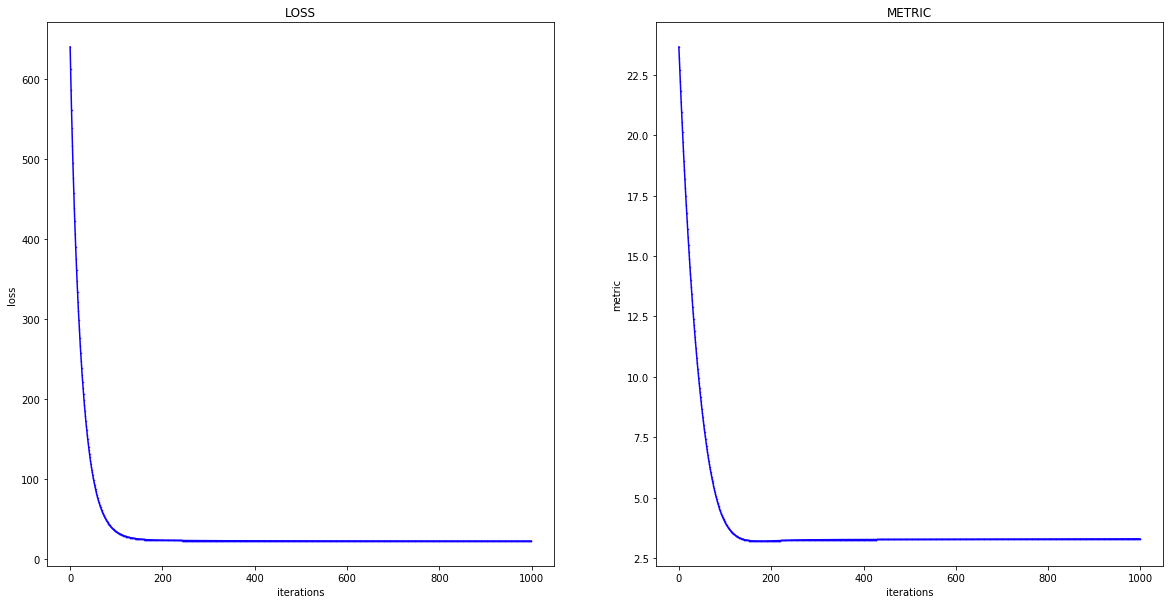

In [14]:
loss = linear_regression.history['loss']
metric = linear_regression.history['metric']

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('LOSS')
ax1.set_xlabel('iterations')
ax1.set_ylabel('loss')
ax1.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='-')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('METRIC')
ax2.set_xlabel('iterations')
ax2.set_ylabel('metric')
ax2.plot(metric, marker='.', color='#0F00FF', markersize=1, linestyle='-')